# Discretización 

Sea $f:[a,b] \to R$ una función. Como la función tiene una cantidad infinitas de puntos es imposible representarla completamente en el computador ya que esté tiene memoria finita.

Lo que hacemos es "discretizar" la función, es decir, tomar una cantidad finita de puntos en el intervalo $[a,b]$ y sus respectivos evaluaciones en $f$. 

Sea $x_0 = a < x_1 < x_2 < \ldots < x_{n-1}=b$ un partición de $[a,b]$. Podemos representar la función $f(x) = \sqrt{x}$ por el arreglo $[\sqrt{x_0}, \sqrt{x_1}, \ldots, \sqrt{x_{n-1}}]$.

Esto lo hacemos de la siguiente manera en python:


In [26]:
import numpy as np
x = np.linspace(0,10,11)
f = np.sqrt(x)
print(x)
print(f)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
  2.44948974  2.64575131  2.82842712  3.          3.16227766]


En este caso la representación que tenemos de la función es la siguiete:


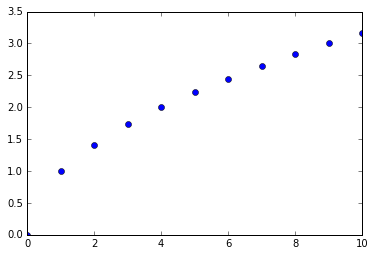

In [27]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(x,f, 'o')

Si queremos una "mejor" representación podemos refinar nuestra partición.


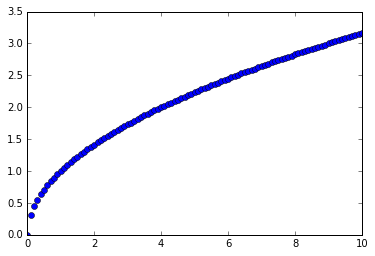

In [28]:
x = np.linspace(0,10,101)
f = np.sqrt(x)
plt.plot(x,f,'o')


## Derivada discreta y ecuaciones diferenciales

Dada la discretización de una función vamos a definir dos tipos de derivadas.

Forward: $ f'(x_i) = \frac{f(x_{i+1}) - f(x_i)}{\Delta x}$

Backward: $ f'(x_i) = \frac{f(x_{i}) - f(x_{i-1})}{\Delta x}$

Con esto vamos a resolver la siguiente ecuación diferencial:

$$ \frac{dy}{dt} + sen(t) y = cos(t) $$

con condición inicial $y(0) = y_0$.

Vamos a resolverlo para $t \in [0,10]$. Entonces discretizamos el tiempo $t_0=0 < t_1 < t_2 < \ldots < t_{n-1}=10$. Ahora escribimos la ecuación para cada punto de nuestra discretización:

$$ \frac{y(t_{i+1}) - y(t_i)}{\Delta t} + sen(t_i)y(t_i) = cos(t_i) $$
$$ y(t_{i+1}) - y(t_i)(1 - sen(t_i)\Delta t) = cos(t_i)\Delta t $$

Por lo que tenemos un sistema de ecuaciones lineales en las variables $y(t_i)$.

Si escribimos el sistema de la forma $Ay = b$ nos queda que:

$$ A = \begin{pmatrix} 1 & 0 & 0 & 0 & \ldots  & 0 \\ 1-sen(t_0)\Delta t & 1 & 0 & 0 &  \ldots & 0 \\ 0 & 1-sen(t_1)\Delta t & 1 & 0 & \ldots & 0  \\ \vdots & \ddots & \ddots & \ddots & \ddots & \vdots \end{pmatrix} , 
b = \begin{pmatrix} y_0 \\ cos(t_0) \\ cos(t_1) \\ \vdots \\ cos(t_{n-2}) \end{pmatrix}$$ 

## Resolución en python



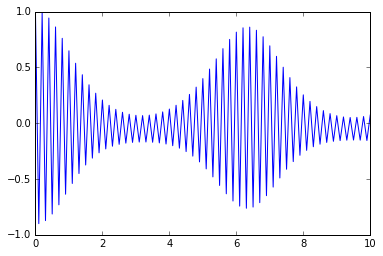

In [29]:
from scipy import linalg

t = np.linspace(0,10,101)
deltat = t[1]-t[0]
A = np.diag(np.ones(101))
t2 = t[:100]
A = A + np.diag(np.ones(100)- deltat* np.sin(t2),-1)
b = np.append([1],deltat*np.cos(t2))
y = linalg.solve(A,b)
plt.plot(t,y)
plt.show()

Ejercicios:

1.- Resuelva la misma ecuación diferencial para la condición inicial $y(0) = 0$.
2.- Resulva la ecuación diferencial para el lado derecho $cos(2t)$.
3.- Resulva la ecuación diferencial usando la derivada discreta de tipo backward.